In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
# Input per-locus info
LOCFILE = "/storage/ileena/ssc-gangstr-denovos/denovos_GW_priors_Jan20/combined/SSC_allphases_011720_denovos_GW_priors_Jan20.locus_stats.tab"

# Make editable in Illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Imports
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats

# Other data paths
ANNOTFILE = "/storage/mgymrek/ssc-denovos/annotations/hg38_gangstr_MasterAnnotation-rmdup.bed"
CODISFILE = "/storage/mgymrek/workspace/ssc-denovos/metadata/codis_hg38.csv"
NISTFILE = "/storage/ileena/denovos4/annotations/nist_codis_info.txt"
MUTEAFILE = "/storage/mgymrek/ssc-denovos/mutea/MUTEA_MutationRates_hg38_GangSTR.bed"

# Color keys
colors = ['gray','red','gold','blue','green','purple','brown','salmon','magenta','cyan','darkblue']

# Output path info
OUTDIR = "pdfs/"

# Load per-locus mutation info
data = pd.read_csv(LOCFILE, delim_whitespace=True)

In [42]:
# Convert locus file to hg19
coords = pd.read_csv("/storage/mgymrek/ssc-denovos/for-gtex/ssc_hg19_coords.bed", sep="\t",
                     names=["chrom1","pos_hg19","end_hg19","coords_hg38"])
coords = coords[coords["chrom1"].apply(lambda x: "X" not in x and "Y" not in x and "_" not in x)]
coords["chrom"] = coords["chrom1"].apply(lambda x: GetChrom(x))
coords["pos"] = coords["coords_hg38"].apply(lambda x: int(x.split(":")[1]))
data = pd.merge(data, coords[["chrom","pos","pos_hg19"]], on=["chrom","pos"])

Adipose-Subcutaneous
MannwhitneyuResult(statistic=6916689.0, pvalue=0.5599766627402993)
0.3355285465169736
3779
3668
Adipose-Visceral
MannwhitneyuResult(statistic=6810006.0, pvalue=0.5315747046442388)
0.34098235234152185
3754
3632
Artery-Aorta
MannwhitneyuResult(statistic=6877250.0, pvalue=0.06609515082824954)
0.438290249466215
3723
3621
Artery-Tibial
MannwhitneyuResult(statistic=6905214.0, pvalue=0.11480371244383147)
0.3315660684143576
3743
3631
Brain-Caudate
MannwhitneyuResult(statistic=6768328.0, pvalue=0.03864068998716572)
0.04563154414764396
3698
3575
Brain-Cerebellum
MannwhitneyuResult(statistic=6516052.0, pvalue=0.5055329268826749)
0.41518483019095137
3680
3542
Cells-Transformedfibroblasts
MannwhitneyuResult(statistic=6411703.0, pvalue=0.40942326823861985)
0.3515543974243835
3642
3510
Esophagus-Mucosa
MannwhitneyuResult(statistic=6877760.0, pvalue=0.28271058857800857)
0.22612179718741848
3749
3641
Esophagus-Muscularis
MannwhitneyuResult(statistic=6877622.0, pvalue=0.673335499743

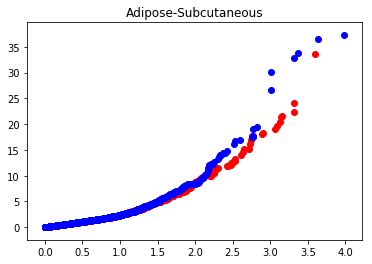

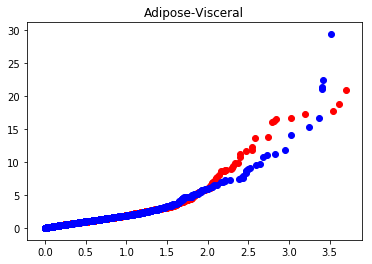

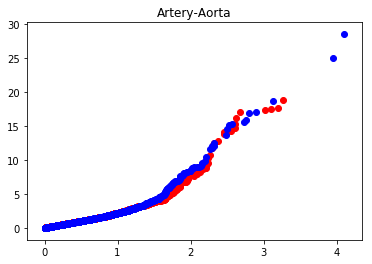

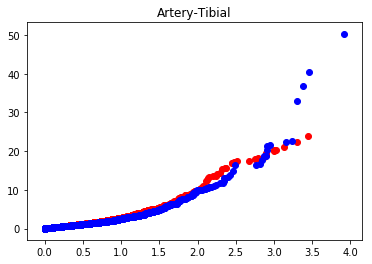

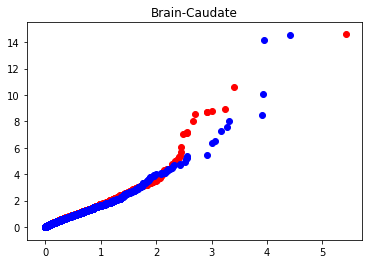

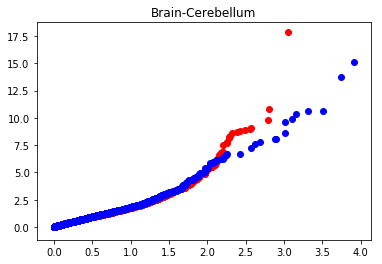

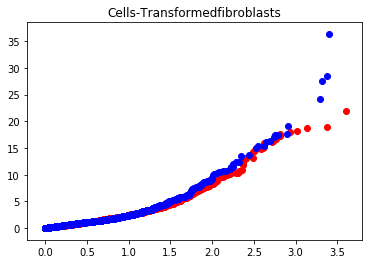

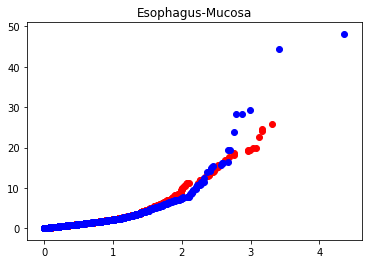

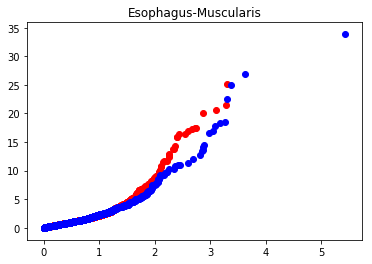

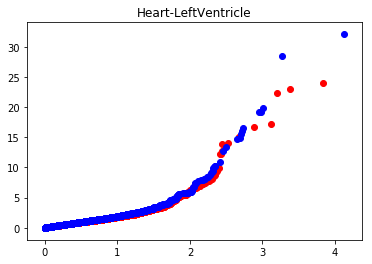

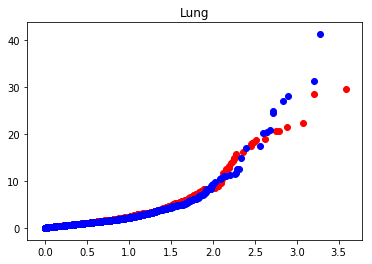

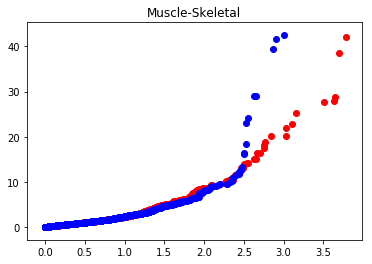

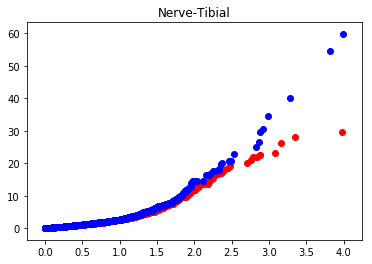

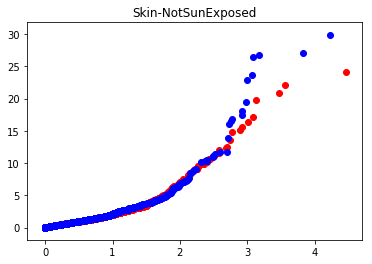

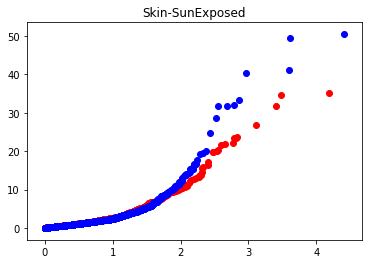

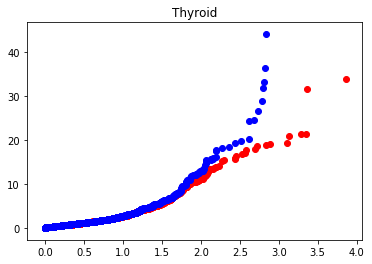

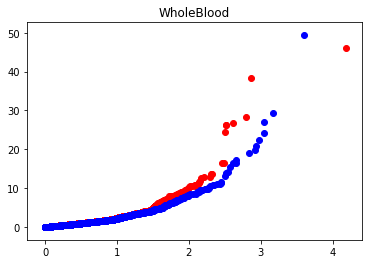

In [85]:
# Load gtex data
# Set up fields
def GetChrom(x):
    if "chr" in str(x): return int(x[3:])
    else: return int(x)
def concat(x):
    return ",".join(x)

TISSUES=["Adipose-Subcutaneous",
         "Adipose-Visceral",
         "Artery-Aorta",
         "Artery-Tibial",
         "Brain-Caudate",
         "Brain-Cerebellum",
         "Cells-Transformedfibroblasts",
         "Esophagus-Mucosa",
         "Esophagus-Muscularis",
         "Heart-LeftVentricle",
         "Lung", 
         "Muscle-Skeletal", 
         "Nerve-Tibial",
         "Skin-NotSunExposed",
         "Skin-SunExposed", 
         "Thyroid",
         "WholeBlood"]
for tissue in TISSUES:
    print(tissue)
    GTEXFILE = "/storage/mgymrek/gtex-estrs/revision/mastertables/%s_master.tab"%tissue
    gtex = pd.read_csv(GTEXFILE, sep="\t")
    gtex["chrom"] = gtex["chrom"].apply(lambda x: GetChrom(x))
    gtex["pos_hg19"] = gtex["str.start"].apply(int)
    gtex = gtex[~np.isnan(gtex["linreg.pval"])]
    #gtex = gtex[gtex["caviar.str.score"]>0.1]
    gtex["linreg.beta"] = gtex["linreg.beta"].apply(abs)
    gtex = gtex.groupby(["chrom","pos_hg19","str.motif.forward"], as_index=False).agg({"linreg.pval": np.min, "linreg.beta": np.max, "gene.name": concat})

    merged = pd.merge(gtex, data, on=["chrom","pos_hg19"])

    aff_pvals = -1*np.log10(sorted(list(merged[(merged["mut_aff"]>0) & (merged["mut_unaff"]==0)].sort_values("linreg.pval")["linreg.pval"])))
    unaff_pvals = -1*np.log10(sorted(list(merged[(merged["mut_unaff"]>0)& (merged["mut_aff"]==0)].sort_values("linreg.pval")["linreg.pval"])))

    print(scipy.stats.mannwhitneyu(aff_pvals, unaff_pvals, alternative="greater"))
    print(scipy.stats.ttest_ind(aff_pvals, unaff_pvals)[1]/2)
          
    print(len(aff_pvals))
    print(len(unaff_pvals))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(-1*np.log10(sorted(list(np.random.uniform(size=len(aff_pvals))))), aff_pvals, color="red")
    ax.scatter(-1*np.log10(sorted(list(np.random.uniform(size=len(unaff_pvals))))), unaff_pvals, color="blue")
    ax.set_title(tissue)

In [118]:
GTEXFILE = "/storage/mgymrek/gtex-estrs/revision/mastertables/%s_master.tab"%"Brain-Caudate"
gtex = pd.read_csv(GTEXFILE, sep="\t")
gtex["chrom"] = gtex["chrom"].apply(lambda x: GetChrom(x))
gtex["pos_hg19"] = gtex["str.start"].apply(int)
gtex = gtex[~np.isnan(gtex["linreg.pval"])]
#gtex = gtex[gtex["caviar.str.score"]>0.1]
#gtex["linreg.beta"] = gtex["linreg.beta"].apply(abs)
#gtex = gtex.groupby(["chrom","pos_hg19","str.motif.forward"], as_index=False).agg({"linreg.pval": np.min, "linreg.beta": np.max, "gene.name": concat})
merged = pd.merge(gtex, data, on=["chrom","pos_hg19"])

In [130]:
# HDAC2 113970946 novel allele. neg effect size.
# new allele is 5 (smaller than all other observed). so should hvae increased expression
# hdac inhibitor alleviates social defects
# this allele is like an hdac activator, opposite effect?
#merged[(merged["mut_unaff"]==0) & (merged["mut_aff"]>=1)].sort_values("caviar.str.score", ascending=False)[["chrom","pos","gene.name","linreg.beta","str.motif.forward","caviar.str.score","mut_aff","mut_unaff"]].head(n=25)
#data[data["pos"]==50505002][["pos_hg19"]]50898785


,chrom,gene,str.start,mashr.beta,mashr.beta.se,mashr.top.str,mashr.significant,str.end,str.motif.forward,str.motif.reverse,...,tdt_counts_unaff_combined,tdt_counts_aff_mother,tdt_counts_aff_father,tdt_counts_aff_combined,tdt_p_mother,tdt_odds_mother,tdt_p_father,tdt_odds_father,tdt_p_combined,tdt_odds_combined


In [127]:
# HDAC2 113970946 novel allele
merged[(merged["mut_unaff"]==0) & (merged["mut_aff"]>=1)].sort_values("caviar.str.score", ascending=False)[["chrom","pos","pos_hg19","gene","gene.name","str.motif.forward","caviar.str.score","mut_aff","mut_unaff"]].head(n=25)


,chrom,pos,pos_hg19,gene,gene.name,str.motif.forward,caviar.str.score,mut_aff,mut_unaff
0,7,64733317,64193695,ENSG00000196247.7,ZNF107,A,0.884696,1,0
39,12,122902573,123387120,ENSG00000130783.9,CCDC62,A,0.754746,1,0
204,7,100458196,100055819,ENSG00000121716.14,PILRB,GT,0.230433,1,0
233,8,92959481,93971709,ENSG00000205133.7,TRIQK,AC,0.209610,1,0
333,1,41073619,41539291,ENSG00000171790.11,SLFNL1,ATCC,0.174320,1,0
361,6,113970946,114292110,ENSG00000196591.7,HDAC2,CTG,0.162401,1,0
499,15,40350843,40643044,ENSG00000128928.4,IVD,AC,0.131178,1,0
557,17,63765121,61842481,ENSG00000087191.8,PSMC5,AC,0.129133,1,0
573,17,49228964,47306326,ENSG00000167083.2,GNGT2,AC,0.127082,1,0
635,9,108905869,111668149,ENSG00000070061.10,IKBKAP,AC,0.118779,1,0
